In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [93]:
data = pd.read_csv("C:/Users/Omer/Documents/smspam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed:2,Unnamed:3,Unnamed:4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [94]:
#Drop column and name change
data = data.drop(["Unnamed:2","Unnamed:3","Unnamed:4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [95]:
data.tail()

,label,text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [96]:
#Count observations in each label
data.label.value_counts()

ham     4827
spam     747
Name: label, dtype: int64

In [97]:
# convert label to a numerical variable
data['label_num'] = data.label.map({'ham':0, 'spam':1})

In [98]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 10)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4459,)
(1115,)
(4459,)
(1115,)


In [102]:
from sklearn.feature_extraction.text import CountVectorizer

In [103]:
vect = CountVectorizer()

In [104]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [105]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578']
['ystrday', 'ything', 'yummmm', 'yummy', 'yun', 'yunny', 'yuou', 'yup', 'yupz', 'zaher', 'zealand', 'zed', 'zeros', 'zindgi', 'zoe', 'zogtorius', 'zoom', 'zyada', 'ãº1', 'ã¼']


In [106]:
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

In [107]:
type(X_test_df)

scipy.sparse.csr.csr_matrix

In [108]:
type(X_train_df)

scipy.sparse.csr.csr_matrix

In [109]:
ham_words = ''
spam_words = ''
spam = data[data.label_num == 1]
ham = data[data.label_num ==0]

In [110]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Omer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [111]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '

        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [112]:
from wordcloud import WordCloud

In [113]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=800, height=800).generate(ham_words)

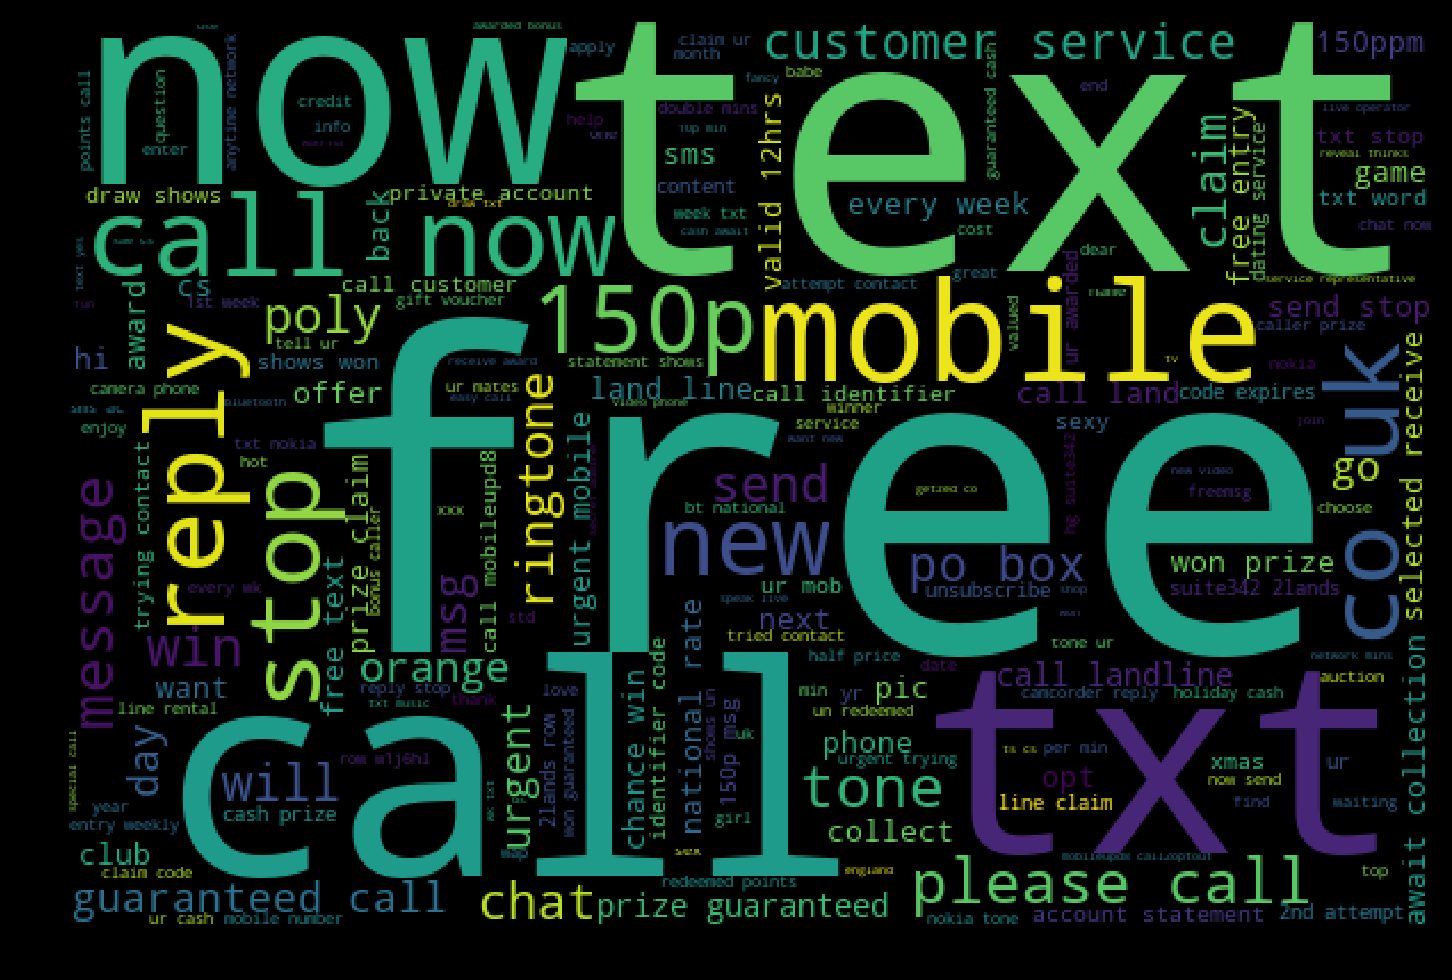

In [114]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

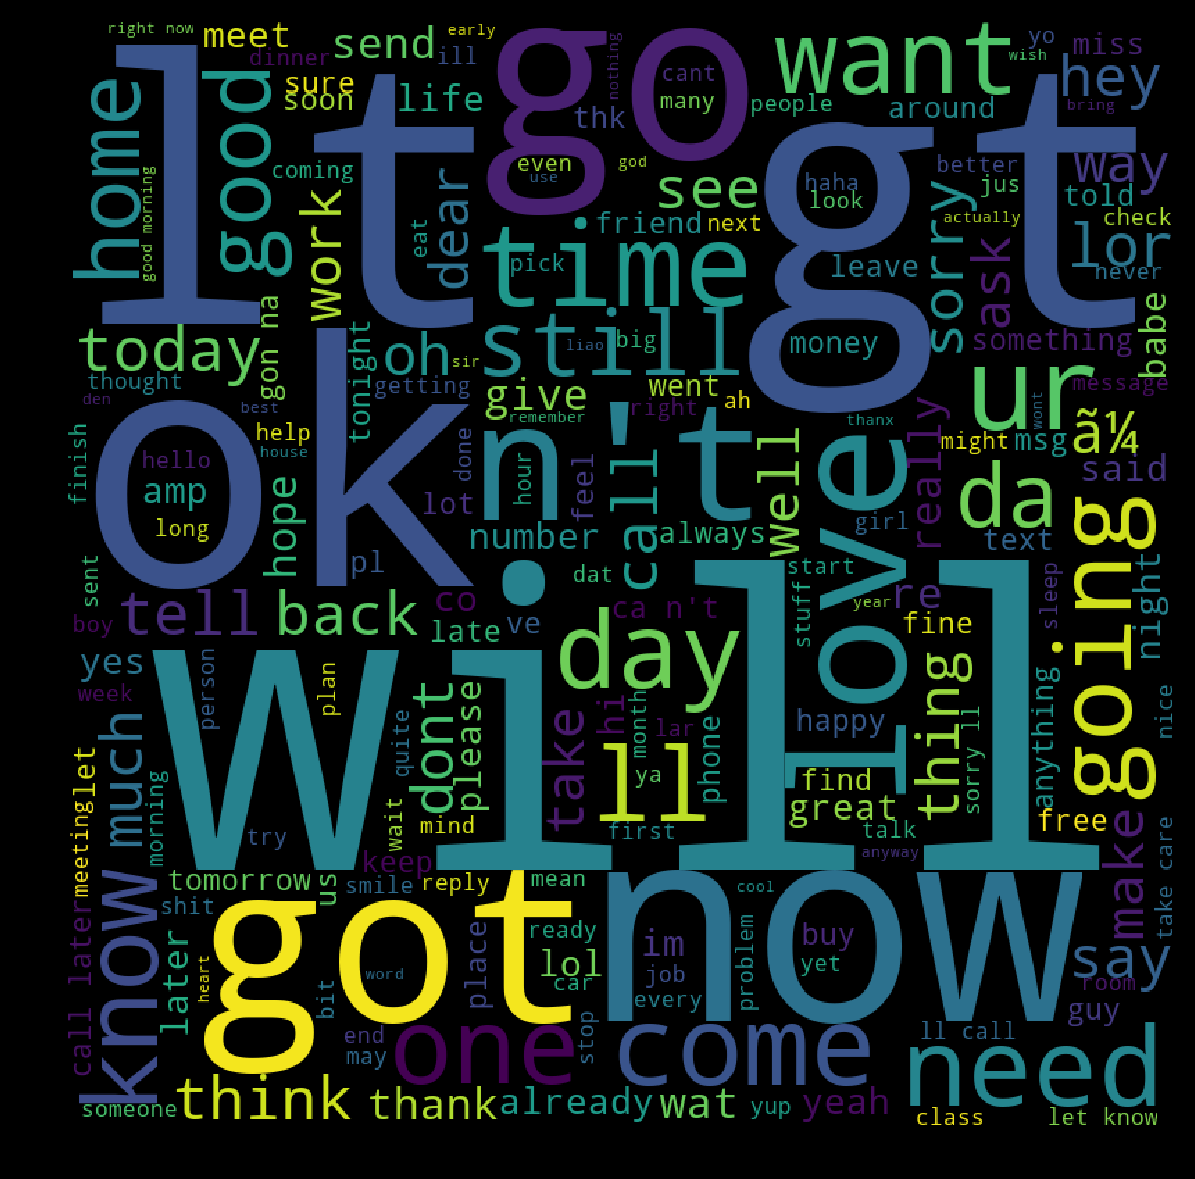

In [115]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [27]:
prediction["Multinomial"] = model.predict(X_test_df)

In [28]:
accuracy_score(y_test,prediction["Multinomial"])

0.9865470852017937

In [29]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      1.00      0.99       989
        Spam       0.98      0.90      0.94       126

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.98      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
prediction["Logistic"] = model.predict(X_test_df)

In [34]:
accuracy_score(y_test,prediction["Logistic"])

0.9811659192825112

In [35]:
print(classification_report(y_test, prediction['Logistic'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       989
        Spam       0.99      0.84      0.91       126

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_train_df,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
prediction["NN"] = model.predict(X_test_df)

In [38]:
accuracy_score(y_test,prediction["NN"])

0.9820627802690582

In [39]:
print(classification_report(y_test, prediction['NN'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       989
        Spam       1.00      0.84      0.91       126

   micro avg       0.98      0.98      0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [40]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
prediction["random_forest"] = model.predict(X_test_df)

In [42]:
accuracy_score(y_test,prediction["random_forest"])

0.968609865470852

In [43]:
print(classification_report(y_test, prediction['random_forest'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       989
        Spam       0.99      0.73      0.84       126

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.97      0.97      0.97      1115



In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
prediction["knn"] = model.predict(X_test_df)

In [46]:
accuracy_score(y_test,prediction["knn"])

0.9327354260089686

In [47]:
print(classification_report(y_test, prediction['knn'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.93      1.00      0.96       989
        Spam       1.00      0.40      0.58       126

   micro avg       0.93      0.93      0.93      1115
   macro avg       0.96      0.70      0.77      1115
weighted avg       0.94      0.93      0.92      1115

